<a href="https://colab.research.google.com/github/aweier/aweier/blob/main/Waste_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import the neccessary Python libraries and the excel file you will be using:

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [3]:
%matplotlib inline
# your resulting graphs from matplotlib will be stored inline in the notebook

In [4]:
df = pd.read_excel(r'C:\Users\ggilpat\Documents\Carpet Waste Calculation 12-4.xlsx', sheet_name = 'Outputs')
df
# Replace the file with the relevant, most updated waste excel file.
# I created the 'Outputs' tab in the excel so that I only load in the columns I want

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ggilpat\\Documents\\Carpet Waste Calculation 12-4.xlsx'

In [ ]:
df = df[df['Waste_Percentage'] >0 ]
df
# removes rows with the null waste_percentage values, or that have no values filled in (at the bottom of the spreadsheet)

,Style,item_nbr,Plant,Shop_Order,Product_Code,Waste_Percentage,sumFeet,Req_Lbs
0,M2164,M216400701,WE,M9324,12,0.013199,11184.00,23766
1,M2164,M216400710,WE,S3358,12,0.024601,3673.00,7806
2,M2164,M216400710,WE,K6945,12,0.016035,7428.50,15786
3,M2164,M216400711,WE,G7126,12,0.022922,4079.00,8668
4,M2164,M216400711,WE,G7127,12,0.015299,8139.00,17296
...,...,...,...,...,...,...,...,...
9693,MD569,MD56900515,15,P0274,2A,0.199826,1002.12,914
9694,MD569,MD56900702,15,P0275,2A,0.199826,1002.12,914
9695,MD569,MD56900705,15,P0276,2A,0.199826,1002.12,914
9696,MD569,MD56900712,15,P0277,2A,0.199826,1002.12,914


### Give an overall summary of the data:

In [ ]:
df1 = df.groupby('Product_Code')['Shop_Order'].nunique()
df1
#Shows total number of shop orders for each product code

Product_Code
12     281
20    2003
21      52
22    6091
24     505
2A      49
2B       2
2D     643
33      42
56      15
Name: Shop_Order, dtype: int64

In [ ]:
df2 = df.groupby('Product_Code')['Style'].nunique()
df2
# Total styles per product code

Product_Code
12     11
20    192
21      6
22    488
24     80
2A      6
2B      1
2D     34
33     12
56      1
Name: Style, dtype: int64

In [ ]:
prod_codes = df['Product_Code'].unique()
prod_codes.sort()
prod_codes

array(['12', '20', '21', '22', '24', '2A', '2B', '2D', '33', '56'],
      dtype=object)

<AxesSubplot:title={'center':'Waste_Percentage'}, xlabel='Product_Code'>

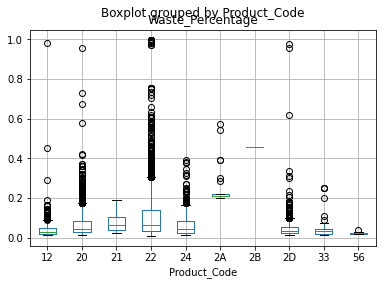

In [ ]:
#Make box plots to compare the quartiles for each product group
df.boxplot(column = 'Waste_Percentage', by = 'Product_Code')

array([[<AxesSubplot:title={'center':'Waste_Percentage'}>]], dtype=object)

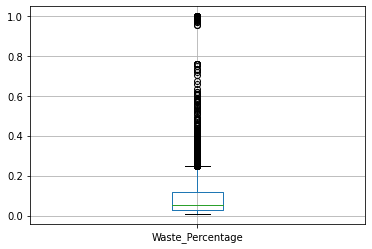

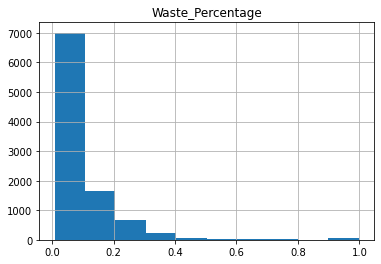

In [ ]:
df.boxplot(column = 'Waste_Percentage')
df.hist(column = 'Waste_Percentage')

Note: in the above histogram, the data is obviously right skewed. In both the histogram and box plot, you can see a group of outliers that stand out (above 90% waste) because they are significantly seperated from the rest of the data points.

### Determine normality for each product group:

The below code loops through each product code in the data set (the prod_codes array was defined above). It checks if that group has at least 20 data points (in order to perform a normality test). If so, it uses the stats normaltest (this required importing scipy.stats earlier). If the p-value from this test is <= 0.05, then we reject the null hypothesis that the data came from a normal distribution. It also creates a histogram for each product code, where you can visualize whether or not the data is normal.

The nlist will keep track of whether the distribution is normal ("Yes", "No", or "N/A") for each product code.

Note: stats.normaltest() is based on D’Agostino and Pearson’s test,  that combines skew and kurtosis to produce an omnibus test of normality. The skewtest portion requires at least 8 samples, and the kurtosis test requires n>=20

Product code 12 has 281 total data points.
Normal test p-value is 1.9227101474466272e-103
This waste percentage data is non-normal. The median is 0.02675196032062538


Product code 20 has 2003 total data points.
Normal test p-value is 0.0
This waste percentage data is non-normal. The median is 0.04497068389320005


Product code 21 has 52 total data points.
Normal test p-value is 0.04439080709143276
This waste percentage data is non-normal. The median is 0.06534482799866015


Product code 22 has 6091 total data points.
Normal test p-value is 0.0
This waste percentage data is non-normal. The median is 0.06559891372026186


Product code 24 has 505 total data points.
Normal test p-value is 1.047280590567056e-58
This waste percentage data is non-normal. The median is 0.04429857768644205


Product code 2A has 49 total data points.
Normal test p-value is 1.9502205826486267e-13
This waste percentage data is non-normal. The median is 0.21115105395956277


Product code 2B has 2 total data points

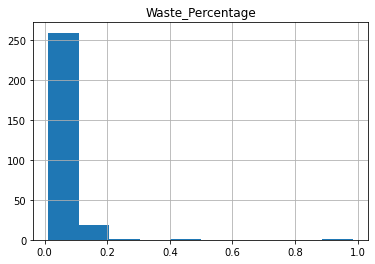

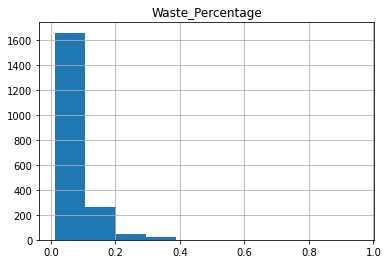

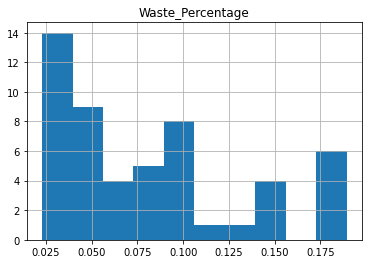

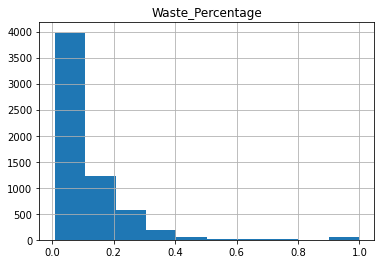

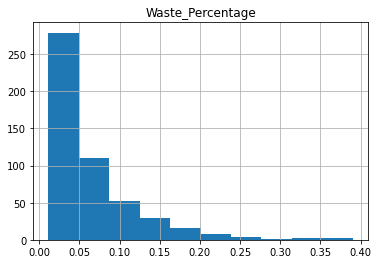

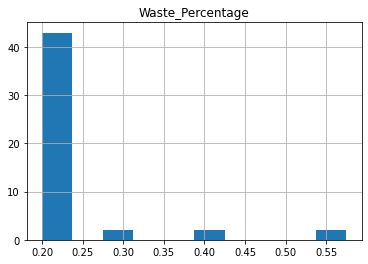

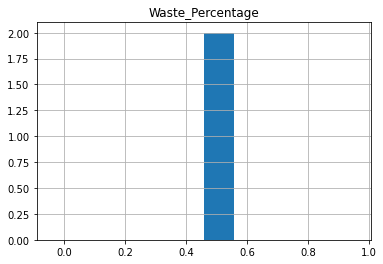

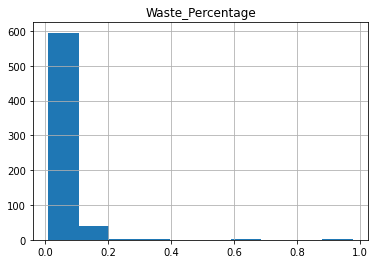

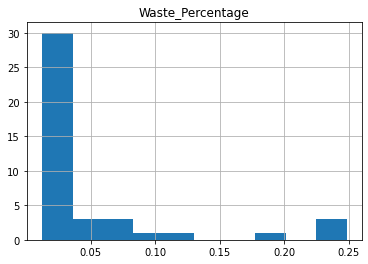

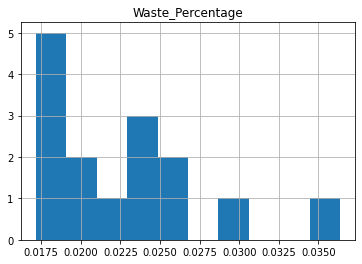

In [ ]:
nlist2 = [] # this will record if each product code has normally distributed data or not
for pc in prod_codes:
    pc_data = df[df['Product_Code'] == pc ]
    print("Product code " + pc + " has " + str(len(pc_data)) + " total data points.")
    if len(pc_data) >= 20:
        p_val = stats.normaltest(pc_data['Waste_Percentage'])[1]
        print("Normal test p-value is " + str(p_val))
        if p_val <= 0.05:
            median = pc_data['Waste_Percentage'].median()
            print("This waste percentage data is non-normal. The median is " + str(median))
            nlist2.append("No")
        else:
            mean = pc_data['Waste_Percentage'].mean()
            print("This waste percentage data is normal (enough). The mean is " + str(mean))
            nlist2.append("Yes")
    else:
        print("Under 20 data points.")
        nlist2.append("N/A")
    print("\n")
    pc_data.hist(column = 'Waste_Percentage')

In [ ]:
nlist2

['No', 'No', 'No', 'No', 'No', 'No', 'N/A', 'No', 'No', 'N/A']

### Examine the relationship between SO size (sumFeet) and waste percentage:

<AxesSubplot:xlabel='sumFeet', ylabel='Waste_Percentage'>

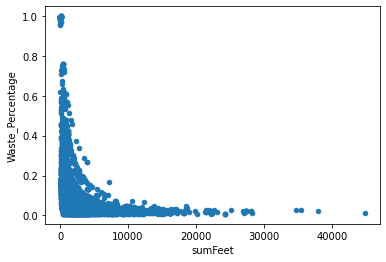

In [ ]:
df.plot.scatter(x='sumFeet', y='Waste_Percentage')

<AxesSubplot:xlabel='sumFeet', ylabel='Waste_Percentage'>

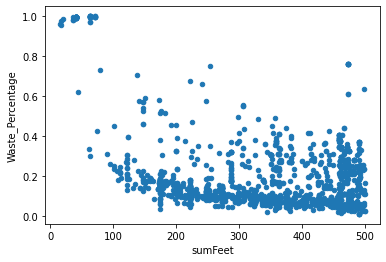

In [ ]:
# look at a much smaller range of sumFeet, where most of the data falls in the plot above
df_view = df[df['sumFeet'] <= 500 ]
df_view.plot.scatter(x='sumFeet', y='Waste_Percentage')

<AxesSubplot:xlabel='sumFeet', ylabel='Waste_Percentage'>

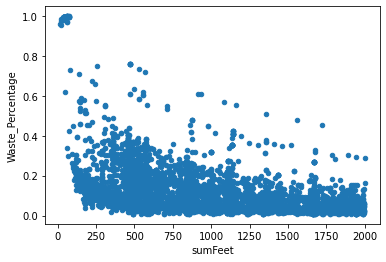

In [ ]:
df_view = df[df['sumFeet'] <= 2000]
df_view.plot.scatter(x='sumFeet', y='Waste_Percentage')

It is very clear that the extreme waste values occur with very small shop orders [the cluster in the top left of these graphs].

The below statements look at the properties of the SO's with extremely high waste. It looks like these all have very small shop orders. No shop orders in the group are above 75 ft. There is also a relatively large gap, with no waste values falling from 80% to about 95%

,Style,item_nbr,Plant,Shop_Order,Product_Code,Waste_Percentage,sumFeet,Req_Lbs
87,M0644,M064400705,WE,R0639,2D,0.957374,16.040000,44
197,M2693,M269300702,WE,P3249,12,0.984472,20.015000,43
823,M4870,M487000200,WE,H1744,20,0.955632,18.015000,37
1645,M6765,M676500530,T1,J5727,22,0.987470,41.072000,33
3649,M9060,M906000505,T1,K1501,22,0.993487,63.072000,42
3665,M9061,M906100111,T1,K7934,22,0.993487,63.072000,42
3684,M9061,M906100557,T1,N9955,22,0.996728,63.072000,42
3689,M9061,M906100597,T1,S4807,22,0.996728,63.072000,42
3731,M9070,M907000575,13,P6123,22,0.994598,36.009558,63
3875,M9102,M910200502,T1,R3103,22,0.970308,63.072000,47


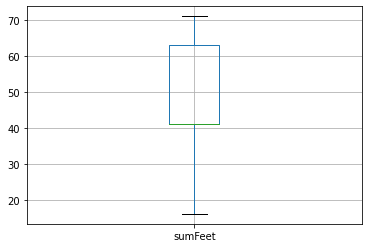

In [ ]:
df_high_waste = df[df['Waste_Percentage'] >= .8 ]
df_high_waste.boxplot(column = 'sumFeet')
df_high_waste


Product code 12
Product code 20
Product code 21
Product code 22
Product code 24
Product code 2A
Product code 2B
Product code 2D
Product code 33
Product code 56


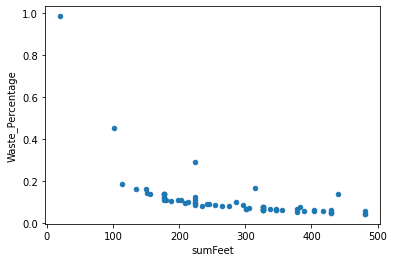

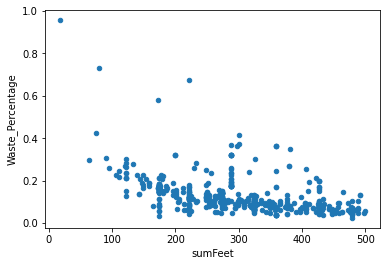

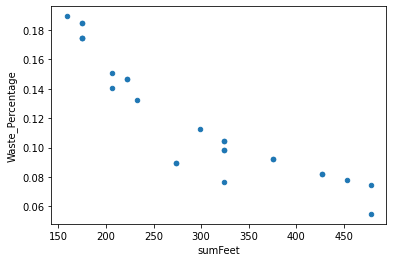

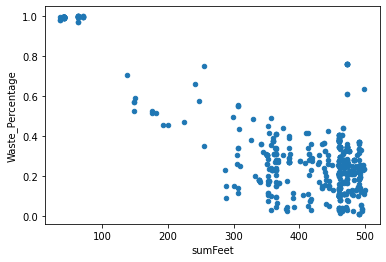

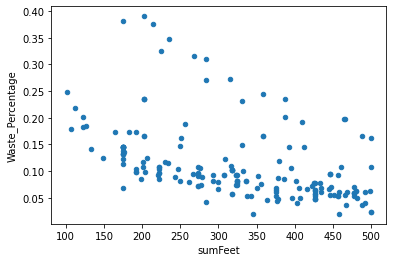

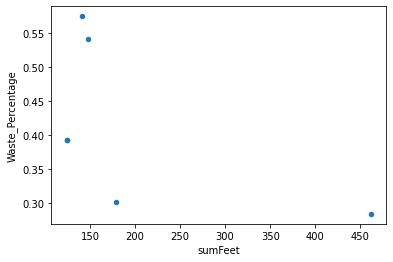

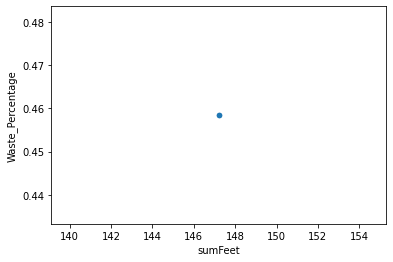

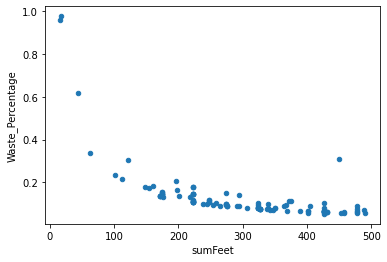

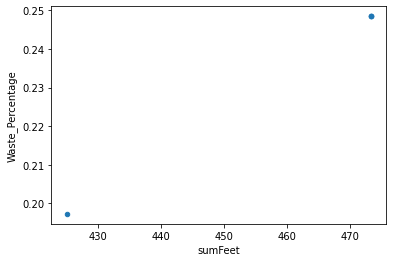

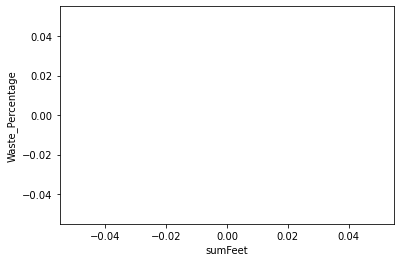

In [ ]:
# Repeating the same scatter plots, now by product cd, to see if this trend occurs accross multiple groups
for pc in prod_codes:
    print("Product code " + pc)
    pc_data = df[df['Product_Code'] == pc ]
    low_feet_data = pc_data[pc_data['sumFeet'] <= 500 ]
    low_feet_data.plot.scatter(x='sumFeet', y='Waste_Percentage')

### Examine: how much data would be excluded if outliers were removed from the data set?

In [ ]:
# What if we directly excluded all outliers, using the 1.5 * IQR rule ?

Q1 = df['Waste_Percentage'].quantile(0.25)
Q2 = df['Waste_Percentage'].quantile(0.50)
Q3 = df['Waste_Percentage'].quantile(0.75)
IQR = Q3 - Q1
#print(Q1, Q3, IQR)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print("Waste percent lower bound: " + str(lower_bound * 100) + " %, waste percent upper bound: " + str(upper_bound*100) + " %")

df5 = df[ (df['Waste_Percentage'] <= upper_bound) & (df['Waste_Percentage'] >= lower_bound) ]
len1 = len(df['Waste_Percentage'])
len2 = len(df5['Waste_Percentage'])
perc_removed = (len1 - len2)/len1*100
print(str(perc_removed) + " % of the data would be removed by excluding outliers based on waste percentage")

Waste percent lower bound: -10.559182706918548 %, waste percent upper bound: 24.916897096300502 %
6.485593307859134 % of the data would be removed by excluding outliers based on waste percentage


Excluding over 6% of the data set is not a small amount, and there is not legitimate reason to exclude these shop order data points. Based on our knowledge so far, these data points above the upper bound for outliers (24.9% waste) are not erronious and don't have significantly different properties from the other shop orders. Further, outliers are a normal (while unusual) part of a distribution and removal will decrease range and variablity from its original value.

However it would make sense to exclude shop orders with very small sumFeet, as we know these shop orders were not run in normal conditions (manufacturing process is different because of the small order size). These orders also include the most extreme waste percentages, with waste percentage going up dramatically at low SO sizes.

The below query looks at the bounds for outliers based on the sumFeet variable. Is there a meaninful lower boundary to use for sumFeet?

In [ ]:
Q1 = df['sumFeet'].quantile(0.25)
Q2 = df['sumFeet'].quantile(0.50)
Q3 = df['sumFeet'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print("lower bound: " + str(lower_bound) + ", upper bound: " + str(upper_bound))

660.1239669 3062.0 2401.8760331
lower bound: -2942.69008275, upper bound: 6664.81404965


The lower bound is a negative value for sumFeet (which is impossible to occur), so no outliers would fall below this lower bound.
In addition, there is no reason to exclude values above this upper bound for outliers. As seen in the scatter plots, shop orders with very high sumFeet have regular levels of waste.

Using the lower bound of 75ft looks like the best point to seperate the extreme outliers, based on the visual representations earlier.

In [ ]:
dff = df[df['sumFeet'] >= 75 ]
dff
# exclude SO's under 75 ft

,Style,item_nbr,Plant,Shop_Order,Product_Code,Waste_Percentage,sumFeet,Req_Lbs
0,M2164,M216400701,WE,M9324,12,0.013199,11184.00,23766
1,M2164,M216400710,WE,S3358,12,0.024601,3673.00,7806
2,M2164,M216400710,WE,K6945,12,0.016035,7428.50,15786
3,M2164,M216400711,WE,G7126,12,0.022922,4079.00,8668
4,M2164,M216400711,WE,G7127,12,0.015299,8139.00,17296
...,...,...,...,...,...,...,...,...
9693,MD569,MD56900515,15,P0274,2A,0.199826,1002.12,914
9694,MD569,MD56900702,15,P0275,2A,0.199826,1002.12,914
9695,MD569,MD56900705,15,P0276,2A,0.199826,1002.12,914
9696,MD569,MD56900712,15,P0277,2A,0.199826,1002.12,914


In [ ]:
len1 = len(df['Waste_Percentage'])
len2 = len(dff['Waste_Percentage'])
perc_removed = (len1 - len2)/len1*100
print(str(perc_removed) + " % of the data was removed by excluding shop orders of under 75 ft.")
print(str(100-perc_removed) + " % of the data was kept.")

0.6299700506041516 % of the data was removed by excluding shop orders of under 75 ft.
99.37002994939584 % of the data was kept.


This exclusion removes a very small portion of the total shop order data.

# Final Analysis Based on Filtered Data Set:
### Excludes Shop Orders below 75 ft.

<AxesSubplot:title={'center':'Waste_Percentage'}, xlabel='Product_Code'>

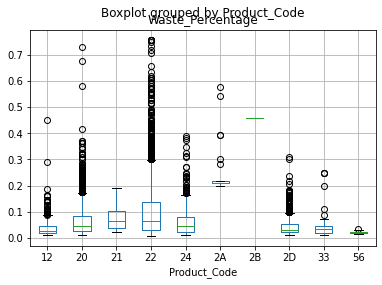

In [ ]:
#Make box plots to compare the quartiles for each product group
dff.boxplot(column = 'Waste_Percentage', by = 'Product_Code')

<AxesSubplot:xlabel='sumFeet', ylabel='Waste_Percentage'>

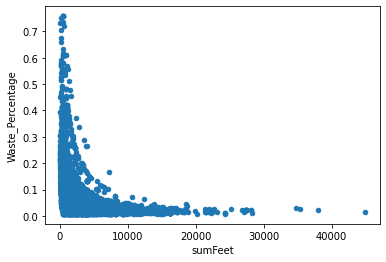

In [ ]:
dff.plot.scatter(x='sumFeet', y='Waste_Percentage')

In [ ]:
dff[dff['Waste_Percentage'] >= .6 ]

,Style,item_nbr,Plant,Shop_Order,Product_Code,Waste_Percentage,sumFeet,Req_Lbs
131,M2086,M208635553,WE,J6989,20,0.676218,222.000000,216
3932,M9113,M911300375,15,M0255,22,0.706863,138.200000,114
4327,M9180,M918000510,13,N2414,22,0.658351,240.783132,334
5280,M9382,M938200761,T1,R0510,22,0.604721,552.400000,480
5294,M9384,M938400111,T1,L0829,22,0.604721,552.400000,480
5296,M9384,M938400327,T1,H9901,22,0.632363,498.800000,433
6015,M9481,M948100500,WE,M7184,20,0.731295,79.950685,136
6513,M9539,M953900700,T1,T6414,22,0.749519,254.960000,189
6967,M9584,M958400430,15,R7012,22,0.609996,473.240000,226
6972,M9584,M958400950,15,J2143,22,0.609996,473.240000,226


Product code 12 has 280 total data points.
Normal test p-value is 1.0236684560074322e-62
This waste percentage data is non-normal. The median is 0.026673909932360042


Product code 20 has 2000 total data points.
Normal test p-value is 1.2834570011638255e-304
This waste percentage data is non-normal. The median is 0.044939910184403895


Product code 21 has 52 total data points.
Normal test p-value is 0.04439080709143276
This waste percentage data is non-normal. The median is 0.06534482799866015


Product code 22 has 6038 total data points.
Normal test p-value is 0.0
This waste percentage data is non-normal. The median is 0.06488199165095143


Product code 24 has 505 total data points.
Normal test p-value is 1.047280590567056e-58
This waste percentage data is non-normal. The median is 0.04429857768644205


Product code 2A has 49 total data points.
Normal test p-value is 1.9502205826486267e-13
This waste percentage data is non-normal. The median is 0.21115105395956277


Product code 2B ha

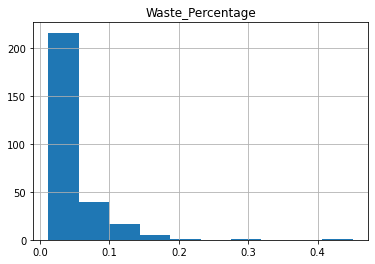

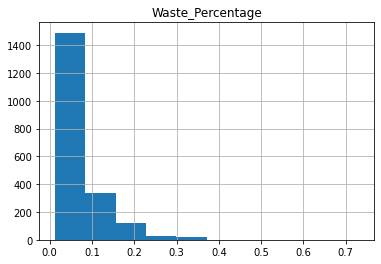

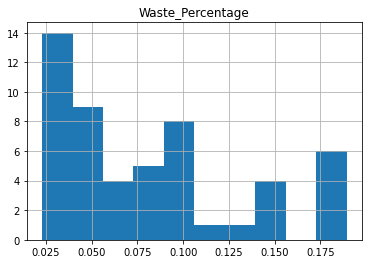

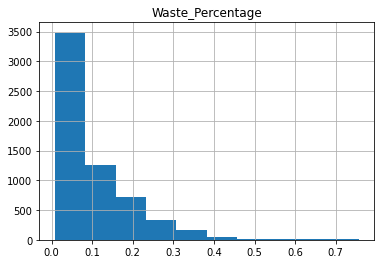

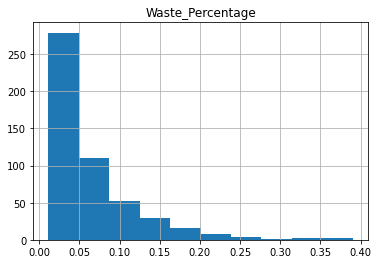

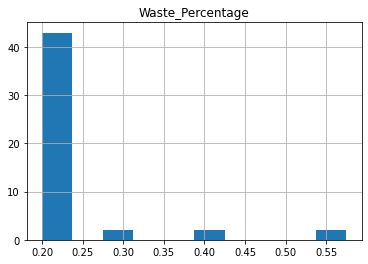

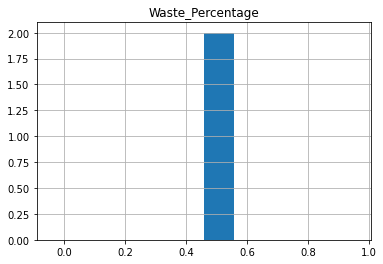

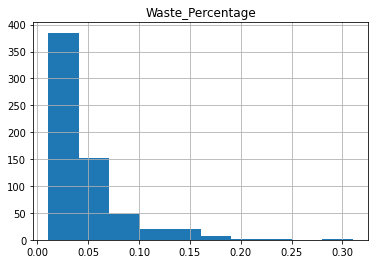

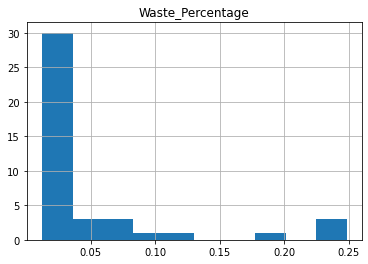

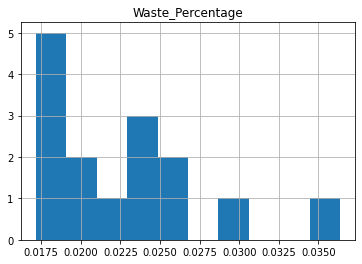

In [ ]:
nlist = []
# this will record if each product code has normally distributed data or not
# repeating this same process from before, for the filtered data set
for pc in prod_codes:
    pc_data = dff[dff['Product_Code'] == pc ]
    print("Product code " + pc + " has " + str(len(pc_data)) + " total data points.")
    if len(pc_data) >= 20:
        p_val = stats.normaltest(pc_data['Waste_Percentage'])[1]
        print("Normal test p-value is " + str(p_val))
        if p_val <= 0.05:
            median = pc_data['Waste_Percentage'].median()
            print("This waste percentage data is non-normal. The median is " + str(median))
            nlist.append("No")
        else:
            mean = pc_data['Waste_Percentage'].mean()
            print("This waste percentage data is normal (enough). The mean is " + str(mean))
            nlist.append("Yes")
    else:
        print("Under 20 data points.")
        nlist.append("N/A")
    print("\n")
    pc_data.hist(column = 'Waste_Percentage')

Note: in addition to p-values, the histograms further indicate that the waste data is normal and right skewed for each product group.
Also note: histograms are much smoother for product codes with more data points, which makes sense. Should not read too much into "bumpy" histograms, when there are a low number of points being graphed.

In [ ]:
summary = dff.groupby('Product_Code')['Waste_Percentage'].describe()[['count','min', '25%', '50%', '75%', 'max']]
summary['range'] = summary['max'] - summary['min']
summary['IQR'] = summary['75%'] - summary['25%']
summary["Normally Distributed?"] = nlist
summary = summary.rename(columns={"50%":"median"})
summary

,count,min,25%,median,75%,max,range,IQR,Normally Distributed?
Product_Code,,,,,,,,,
12,280.0,0.011995,0.019887,0.026674,0.046734,0.450727,0.438732,0.026847,No
20,2000.0,0.011976,0.026952,0.044940,0.085696,0.731295,0.719319,0.058745,No
21,52.0,0.022969,0.038847,0.065345,0.104782,0.189361,0.166393,0.065935,No
22,6038.0,0.007648,0.031238,0.064882,0.139063,0.757239,0.749590,0.107825,No
24,505.0,0.011484,0.022855,0.044299,0.081438,0.390292,0.378809,0.058583,No
2A,49.0,0.199826,0.211151,0.211151,0.218711,0.574886,0.375061,0.007560,No
2B,2.0,0.458471,0.458471,0.458471,0.458471,0.458471,0.000000,0.000000,N/A
2D,639.0,0.010907,0.023153,0.031649,0.053436,0.310221,0.299315,0.030283,No
33,42.0,0.012381,0.019854,0.034796,0.045868,0.248457,0.236076,0.026013,No


In [ ]:
summary.to_clipboard()
#this copies the above data frame, so that you can paste it wherever you want to

## Additional Analysis for Reference:

### Below: give a summary of the data that was excluded from the primary data set (ie. Shop orders below 75 ft)

array([[<AxesSubplot:title={'center':'Waste_Percentage'}>]], dtype=object)

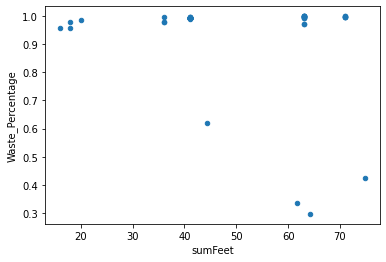

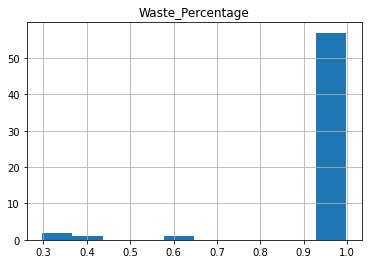

In [ ]:
df_excluded = df[df['sumFeet'] < 75 ]
df_excluded.plot.scatter(x='sumFeet', y='Waste_Percentage')
df_excluded.hist(column = 'Waste_Percentage')

<AxesSubplot:>

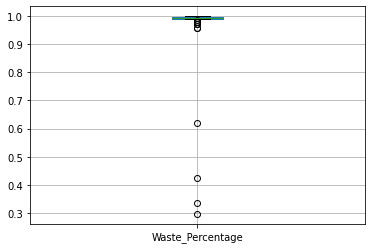

In [ ]:
df_excluded.boxplot(column = 'Waste_Percentage')

In [ ]:
p_val = stats.normaltest(df_excluded['Waste_Percentage'])[1]
print("Normal test p-value is " + str(p_val))
if p_val <= 0.05:
    median = df_excluded['Waste_Percentage'].median()
    print("This waste percentage data is non-normal. The median is " + str(median))
else:
    mean = df_excluded['Waste_Percentage'].mean()
    print("This waste percentage data is normal (enough). The mean is " + str(mean))

Normal test p-value is 5.427930108593836e-17
This waste percentage data is non-normal. The median is 0.9928779860960757


In [ ]:
summary_excluded = df_excluded['Waste_Percentage'].describe()[['count','min', '25%', '50%', '75%', 'max', 'mean']]
summary_excluded['range'] = summary_excluded['max'] - summary_excluded['min']
summary_excluded['IQR'] = summary_excluded['75%'] - summary_excluded['25%']
summary_excluded.to_clipboard() # This automatically copies these results to your clipboard
summary_excluded

count    61.000000
min       0.296866
25%       0.990712
50%       0.992878
75%       0.994864
max       0.998542
mean      0.953489
range     0.701676
IQR       0.004151
Name: Waste_Percentage, dtype: float64

### Below: gives a summary of ALL valid shop orders, and does not exclude shop orders below 75 ft

In [ ]:
summary2 = df.groupby('Product_Code')['Waste_Percentage'].describe()[['count','min', '25%', '50%', '75%', 'max']]
summary2['range'] = summary2['max'] - summary2['min']
summary2['IQR'] = summary2['75%'] - summary2['25%']
summary2["Normally Distributed?"] = nlist2
summary2 = summary2.rename(columns={"50%":"median"})
summary2

,count,min,25%,median,75%,max,range,IQR,Normally Distributed?
Product_Code,,,,,,,,,
12,281.0,0.011995,0.019887,0.026752,0.047011,0.984472,0.972477,0.027124,No
20,2003.0,0.011976,0.026952,0.044971,0.085745,0.955632,0.943656,0.058793,No
21,52.0,0.022969,0.038847,0.065345,0.104782,0.189361,0.166393,0.065935,No
22,6091.0,0.007648,0.031693,0.065599,0.140958,0.998542,0.990893,0.109265,No
24,505.0,0.011484,0.022855,0.044299,0.081438,0.390292,0.378809,0.058583,No
2A,49.0,0.199826,0.211151,0.211151,0.218711,0.574886,0.375061,0.007560,No
2B,2.0,0.458471,0.458471,0.458471,0.458471,0.458471,0.000000,0.000000,N/A
2D,643.0,0.010907,0.023169,0.031711,0.053619,0.976739,0.965832,0.030449,No
33,42.0,0.012381,0.019854,0.034796,0.045868,0.248457,0.236076,0.026013,No


In [ ]:
summary2.to_clipboard()